In [1]:
import matplotlib.pyplot as plot
import powerlaw, time
from itertools import product

import igraph

In [2]:
metabolites = set()
reactions = set()
edges = 0
vertex_degree = {}
graph = {}

In [3]:
def is_reaction(string):
    return string.startswith("REACTION")

# Open the source file for reading
with open("shared/homework1/hsmetnet.txt", "r") as f:
    # Iterate over each line in the source file (delimited by the character '\n')
    for line in f:
        # Parse the metabolite and reaction name into a tuple
        tup = [x for x in line.rstrip().split("\t")]
        
        if tup[0] in graph:
            graph[tup[0]].add(tup[1])
        else:
            graph[tup[0]] = set([tup[1]])
        
        for item in tup:
            if is_reaction(item):
                # item is all uppercase, so it must be a reaction
                reactions.add(item)
            else:
                # item is not uppercase, so it must be a metabolite
                metabolites.add(item)
                
                # Get the current degree of the metabolite node (or 0 if it hasn't been encountered yet) and incrememnt it by one
                vertex_degree[item] = vertex_degree.get(item, 0) + 1
                
            edges += 1

# Problem 1

In this graph, each vertex is either a metabolite or a reaction. Each edge is an association of a metabolite with a reaction. How many distinct metabolites are there in the graph? How many reactions? How many edges are there? Calculate the degree k = k_in + k_out of each of the metabolite vertices (you don’t need to calculate the degree for the vertices that correspond to reactions). What are the top six metabolites in terms of vertex degree in the graph?

In [4]:
print("Number of distinct metabolites:", len(metabolites))

Number of distinct metabolites: 2340


In [5]:
print("Number of distinct reactions:", len(reactions))

Number of distinct reactions: 5539


In [6]:
print ("Number of edges in graph:", edges)

Number of edges in graph: 39416


In [7]:
print("Six metabolites with the highest vertex degree:") # This unintentionally sounds like a Buzzfeed headline
for key in sorted(vertex_degree, key=vertex_degree.get, reverse=True)[:6]:
    print("\t{}: {}".format(vertex_degree[key], key))

Six metabolites with the highest vertex degree:
	1202: ATP
	967: ADP
	562: phosphate
	456: peptide
	383: [protein] (L-serine/L-threonine) phosphate
	383: [protein]-(L-serine/L-threonine)


# Problem 2

Plot the distribution of the degrees of these vertices, on log-log scale. Is the degree distribution well-described by a power law? Calculate the exponent α of the best-fit power-law p_k ∝ k^-α.  How does the α that you get compare to the estimate of the power-law exponent reported by Jeong et al. in their 2000 article in Nature, “The large-scale organization of metabolic networks” (vol. 407, pp. 651–654)? Based on structure of the network that you analyzed (bipartite, containing reactions) vs. the structure of the network that they analyzed (network projected to a network containing only metabolites), is it appropriate to compare the exponents? Why or why not?

[(1, 710), (2, 581), (3, 259), (4, 175), (5, 96), (6, 87), (7, 60), (8, 56), (9, 38), (10, 23), (11, 26), (12, 13), (13, 18), (14, 10), (15, 12), (16, 10), (17, 13), (18, 10), (19, 5), (20, 7), (21, 7), (22, 4), (23, 2), (24, 5), (25, 5), (26, 6), (27, 5), (29, 4), (30, 6), (31, 6), (32, 2), (35, 3), (36, 2), (37, 3), (38, 2), (39, 3), (41, 2), (42, 2), (43, 2), (44, 1), (46, 2), (48, 1), (50, 2), (51, 3), (52, 2), (54, 1), (57, 1), (62, 2), (63, 3), (64, 1), (69, 2), (73, 2), (74, 2), (76, 1), (83, 2), (84, 2), (85, 2), (91, 2), (92, 2), (93, 1), (99, 1), (101, 1), (103, 1), (109, 1), (120, 1), (122, 1), (178, 1), (219, 1), (221, 1), (225, 1), (226, 1), (265, 1), (266, 1), (280, 1), (298, 1), (365, 1), (379, 1), (383, 2), (456, 1), (562, 1), (967, 1), (1202, 1)]


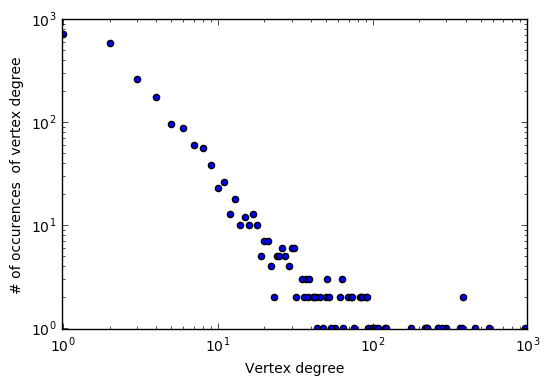

In [8]:
test = {}

for vertex in vertex_degree:
    degree = vertex_degree[vertex]
    test[degree] = test.get(degree, 0) + 1
    
ax = plot.subplot(111) # I have no idea what this does, but if you take it out everything breaks
    
#plot.plot(list(test.keys()), list(test.values()))
print(sorted(list(zip(test.keys(), test.values()))))
ax.scatter(list(test.keys()), list(test.values()))
ax.set_yscale('log')
ax.set_xscale('log')

plot.ylabel('# of occurences  of vertex degree')
plot.xlabel("Vertex degree")
plot.xlim(0, 10**3)
plot.ylim(0, 10**3)
plot.show()

**Question:** Is the degree distribution well-described by a power law?

**My answer:** Yes, roughly. If you look strictly at the left half of the scatter plot, you can see a pretty well defined line of points forming. However, towards the right and bottom of the scatter plot, things start to go haywire.

Calculate the exponent α of the best-fit power-law p_k ∝ k^-α.

In [9]:
#print (list(vertex_degree.values()))
fit = powerlaw.Fit(list(vertex_degree.values()))
print("Alpha:", fit.power_law.alpha)
#print("Sigma:", fit.power_law.sigma) # I don't know what sigma is, but the documentation for the module powerlaw included it
#fit.distribution_compare('power_law', 'exponential') # Documentation says this is logliklihood. I don't know what that means.

Alpha: 2.08152718671


Calculating best minimal value for power law fit
/usr/local/lib/python3.4/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


**Question:** How does the α that you get compare to the estimate of the power-law exponent reported by Jeong et al. in their 2000 article in Nature, “The large-scale organization of metabolic networks” (vol. 407, pp. 651–654)?

**My Answer:** Jeong et al. estimated the power-law exponent (in their article they named it gamma) was 2.2. Using the same number of significant digits, the power-law exponent I calculated from the given data (which I named alpha) is 2.3. This is very similar, and given the granularity of the data I would be quite confident with this number.

**Question:** Based on structure of the network that you analyzed (bipartite, containing reactions) vs. the structure of the network that they analyzed (network projected to a network containing only metabolites), is it appropriate to compare the exponents? Why or why not?

**My Answer:** I believe it is appropriate to compare the two results. It is relatively inconsequential to know _what_ reactions are happening, but only that a reaction _is_ happening at all. If further analysis is needed, it would be helpful to know what reactions each metabolite are participating in, but for the calculation of the power-law exponent it is unneccesary. 

# Problem 3

Calculate the shortest-path-length between all pairs of metabolites (vertices) in the directed graph. Why are some of these path lengths infinite? Calculate the average of the shortest-path-length between all pairs of metabolites in the giant (weakly connected) component of the network, by throwing away any shortest-paths distance value if it is infinite. Calculate the maximum of the shortest-path-length between all pairs of metabolites (throwing away infinite values, as before) in the giant (weakly connected) component of the network (i.e., you are calculating the diameter of the giant component). Why are the distances that we get, roughly twice those reported in Jeong et al., 2000?

In [10]:
def distance(source, target, graph):
    queue = [(source, [source])]
    while queue:
        (vertex, path) = queue.pop(0)
        if vertex not in graph:
            return None
        for next in graph[vertex] - set(path):
            if next == target:
                #yield path + [next]
                return len(path) + 1
            else:
                queue.append((next, path + [next]))
    

In [11]:
distances = []

mygraph = igraph.Graph()
for metabolite in metabolites:
    mygraph.add_vertex(metabolite)
    
for vertex1 in graph:
    if vertex1.isupper():
        continue
    
    for reaction in graph[vertex1]:
        if reaction not in graph:
            #print(reaction, "is a reaction with no outputs.")
            continue
            
        for vertex2 in graph[reaction]:
            #print(vertex1, "->", vertex2)
            mygraph.add_edge(vertex1, vertex2)

for vertex in mygraph.vs:
    distances.append([i for i in vertex.shortest_paths()[0] if i not in (float("inf"), 0)])
    
#print(distances)

**Question:** Why are some of these path lengths infinite?

**My Answer:** Some paths are infinite because they are not connected by any edges.

In [12]:
print("Average shortest path distance:", sum([sum(i) for i in distances])/sum([len(i) for i in distances]))
print("Average path length (igraph):  ", mygraph.average_path_length())

Average shortest path distance: 4.468129860634779
Average path length (igraph):   4.468129860634779


In [13]:
print("Longest geodesic path:", max([max(i) for i in distances if len(i) > 0]))

Longest geodesic path: 15


**Question:** Why are the distances that we get, roughly twice those reported in Jeong et al., 2000?

**My Answer:** The average path length I calculated was 4.4, which is within the range that Jeong et al. demonstrated in Figure 3b in their letter to nature. This is probably because I removed the reaction verticies in my graph before I calculated path lengths. If one were to leave the reaction verticies when calculating the average path length, it would seem logical that the average path length would double because each metabolite vertex is separated by one reaction vertex.

# Problem 4

Calculate the shortest-paths betweenness centrality for all metabolites in the directed network. Plot the scatter plot of betweenness centrality vs. vertex degree for all metabolites, on log-log scale. Among metabolites with degree k = 2, what metabolite has highest betweenness centrality in the network? Search on this metabolite in the HumanCyc database at biocyc.org/HUMAN, using the search box. You will see two proteins listed in the “Proteins” section of the search results; these are the enzymes that are immediately upstream and downstream of this metabolite in a metabolic pathway. Click on the first bullet-point link in the “Proteins” section to go to the Gene page for this enzyme. Read the Summary description. What important metabolic cycle is this enzyme involved in? What is the known consequence of a mutation in this gene, from a health standpoint?

In [14]:
xaxis = []
yaxis = []

for vertex in mygraph.vs():
    xaxis.append(vertex.degree())
    yaxis.append(vertex.betweenness())

X axis range: 0 942
Y axis range: 0.0 443364.5701651528


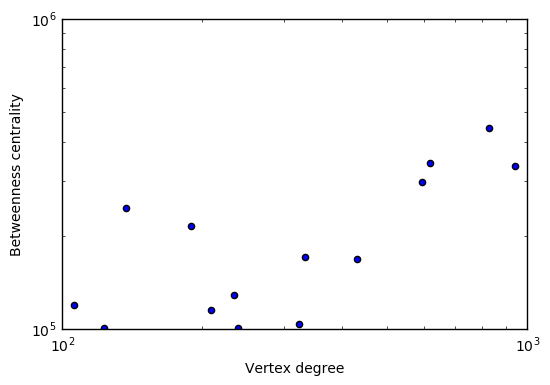

In [15]:
axi = plot.subplot(111)

print("X axis range:", min(xaxis), max(xaxis))
print("Y axis range:", min(yaxis), max(yaxis))

#print(xaxis)
#print(yaxis)

#axi.scatter(xaxis, yaxis)
axi.scatter(mygraph.degree(), mygraph.betweenness())
axi.set_yscale('log')
axi.set_xscale('log')

plot.ylabel('Betweenness centrality')
plot.xlabel("Vertex degree")
#plot.xlim(0, 1000)
#plot.ylim(0, 10**6)
plot.show()

The above plot does not match they the plot given in the hints file, and it does not look like how I expected it to. If you look at the range of the values in the x and y axes, they do not match up with the plot at all. I do not understand why the plot is not showing the correct data. If you inspect the data, however, it appears to be correct. The plot is just not displaying the data correctly and I don't know why.

To view the data plotted in Excel, open the file attached on Canvas. It contains a graph that looks like it's supposed to. Apparently matplotlib is just unable to plot this graph correctly. The scatterplot in the Excel workbook looks like one would expect it to and it matches the hint graph.

In [16]:
print("Metabolite with degree two and highest betweenness:", max(list(mygraph.vs.select(_degree_eq=2)), key=lambda x: x.betweenness())["name"])

Metabolite with degree two and highest betweenness: 6-pyruvoyl tetrahydropterin


The metabolite 6-pyruvoyl tetrahydropterin is not the same as the given in the hints file. This is most likely due to the restructuring of the graph I did to remove all of the reaction vertices. More in depth exploring would be required to back up this claim than this assignment allows. This would be an interesting subject to explore for the class project.